In [16]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

#### Load and inspect DataFrame

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Fill zeros with NaNs

In [8]:
def insert_NaNs(df):
    """
    Replaces zeros with NaNs in the original Pima dataframe.
    :param df: (pd.DataFrame) the dataframe
    :return: (pd.DataFrame) the corrected dataframe
    """
    # mark zero values as missing or NaN
    df_nan = df.replace(0, np.NaN)
    
    # Correct for pregnancies and outcome colums for which we do not want NaNs
    df_nan['Pregnancies'].fillna(0, inplace = True)
    df_nan['Outcome'].fillna(0, inplace = True)
    
    return df_nan
    

In [9]:
df_nan = insert_NaNs(df)

In [10]:
df_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


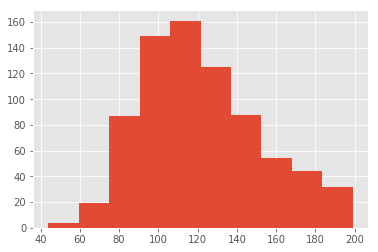

In [15]:
plt.style.use('ggplot')
df_nan['Glucose'].hist()

16.226363362677436 0 7.499324405516513


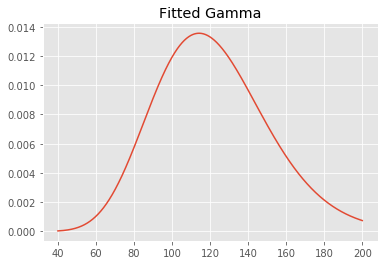

In [32]:
x = np.linspace(40,200,1000)
# Gamma
shape, loc, scale = gamma.fit(df['Glucose'][df['Glucose'] != 0], floc = 0)
print(shape, loc, scale)
y = gamma.pdf(x, shape, loc, scale)
plt.title('Fitted Gamma')
plt.plot(x, y)
plt.show()